In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
def objective_function(x, data):
    diff = data - x
    return np.sum(diff ** 2)


def initialize_population(pop_size, dim, bounds):
    pop = np.random.uniform(bounds[0], bounds[1], (pop_size, dim))
    return pop


def update_position(pop, alpha, beta, delta, a, bounds):
    pop_size, dim = pop.shape
    new_pop = np.zeros((pop_size, dim))

    for i in range(pop_size):
        for j in range(dim):
            r1, r2 = np.random.rand(), np.random.rand()
            A1 = 2 * a * r1 - a
            C1 = 2 * r2

            D_alpha = np.abs(C1 * alpha[j] - pop[i, j])
            X1 = alpha[j] - A1 * D_alpha

            r1, r2 = np.random.rand(), np.random.rand()
            A2 = 2 * a * r1 - a
            C2 = 2 * r2

            D_beta = np.abs(C2 * beta[j] - pop[i, j])
            X2 = beta[j] - A2 * D_beta

            r1, r2 = np.random.rand(), np.random.rand()
            A3 = 2 * a * r1 - a
            C3 = 2 * r2

            D_delta = np.abs(C3 * delta[j] - pop[i, j])
            X3 = delta[j] - A3 * D_delta

            new_pop[i, j] = (X1 + X2 + X3) / 3

        new_pop[i, :] = np.clip(new_pop[i, :], bounds[0], bounds[1])

    return new_pop


def gwo(objective_function, bounds, dim, pop_size, max_iter, data):
    pop = initialize_population(pop_size, dim, bounds)
    alpha, beta, delta = np.zeros(dim), np.zeros(dim), np.zeros(dim)
    alpha_score, beta_score, delta_score = float(
        "inf"), float("inf"), float("inf")

    convergence_curve = np.zeros(max_iter)

    for t in range(max_iter):
        for i in range(pop_size):
            fitness = objective_function(pop[i, :], data)

            if fitness < alpha_score:
                delta_score = beta_score
                delta = beta.copy()

                beta_score = alpha_score
                beta = alpha.copy()

                alpha_score = fitness
                alpha = pop[i, :].copy()

            elif fitness < beta_score:
                delta_score = beta_score
                delta = beta.copy()

                beta_score = fitness
                beta = pop[i, :].copy()

            elif fitness < delta_score:
                delta_score = fitness
                delta = pop[i, :].copy()

        a = 2 - t * (2 / max_iter)

        pop = update_position(pop, alpha, beta, delta, a, bounds)
        convergence_curve[t] = alpha_score

        print(f"Iteration: {t+1}, Best Score: {alpha_score}")

    return alpha, alpha_score, convergence_curve


def load_data(filepath, include_rows):
    df = pd.read_excel(filepath)
    df = df.loc[include_rows]
    return df.values, df


# Function to plot the data

def plot_data(df, title_name):
    x = df['Result X']
    df = df.drop(columns=['Result X'])

    for column in df.columns:
        plt.plot(x, df[column], label=column)

    plt.title(title_name)
    plt.xlabel('Voltage')
    plt.ylabel('Current')
    plt.legend(loc='best')
    plt.show()

Iteration: 1, Best Score: 168788.18895622724
Iteration: 2, Best Score: 168706.98561627461
Iteration: 3, Best Score: 94150.3029059364
Iteration: 4, Best Score: 94150.3029059364
Iteration: 5, Best Score: 63539.8255501149
Iteration: 6, Best Score: 55005.923836914204
Iteration: 7, Best Score: 51018.44709633667
Iteration: 8, Best Score: 51018.44709633667
Iteration: 9, Best Score: 48514.494819614294
Iteration: 10, Best Score: 47524.66915877607
Iteration: 11, Best Score: 45566.86310304307
Iteration: 12, Best Score: 45491.29143645335
Iteration: 13, Best Score: 43924.94057495421
Iteration: 14, Best Score: 42395.723445351294
Iteration: 15, Best Score: 42147.75117375628
Iteration: 16, Best Score: 42147.75117375628
Iteration: 17, Best Score: 42147.75117375628
Iteration: 18, Best Score: 41054.62850125879
Iteration: 19, Best Score: 41054.62850125879
Iteration: 20, Best Score: 40305.54311377762
Iteration: 21, Best Score: 40305.54311377762
Iteration: 22, Best Score: 40305.54311377762
Iteration: 23, Be

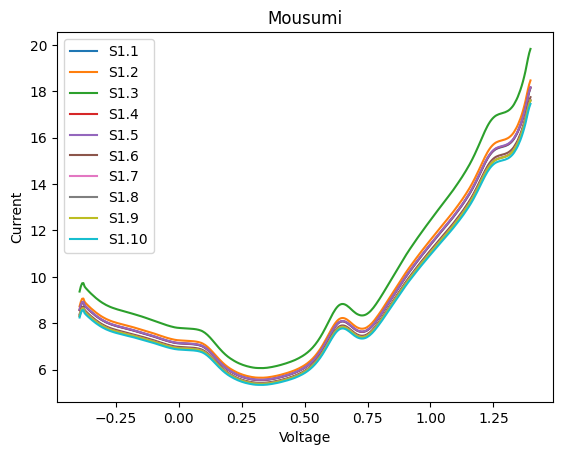

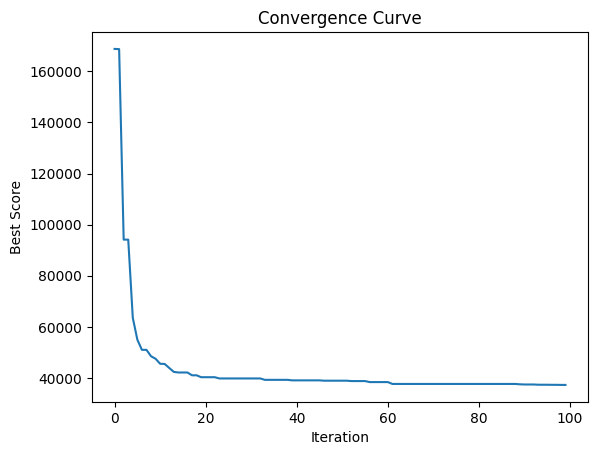

In [7]:
# Main function
if __name__ == "__main__":
    filename = 'sample1.xlsx'  # Replace with your actual file name
    filepath = '../' + filename
    include_rows = range(1, 358)  # Include rows
    data, df = load_data(filepath, include_rows)

    # Parameters
    bounds = [-10, 10]  # Adjust based on your problem
    dim = data.shape[1] - 1  # Exclude 'Result X' from dimensions
    pop_size = 20
    max_iter = 100

    # Exclude 'Result X' from data for the optimization
    data_for_optimization = data[:, 1:]

    best_solution, best_score, convergence_curve = gwo(
        objective_function, bounds, dim, pop_size, max_iter, data_for_optimization)

    print(f"Best Solution: {best_solution}")
    print(f"Best Score: {best_score}")

    # Plot the data
    title_name = 'Mousumi'
    plot_data(df, title_name)

    # Plot the convergence curve
    plt.plot(convergence_curve)
    plt.title('Convergence Curve')
    plt.xlabel('Iteration')
    plt.ylabel('Best Score')
    plt.show()

Iteration: 1, Best Score: 166914.39232547587
Iteration: 2, Best Score: 147739.38369175082
Iteration: 3, Best Score: 111441.91397805749
Iteration: 4, Best Score: 82123.43762661374
Iteration: 5, Best Score: 71170.22708965499
Iteration: 6, Best Score: 61054.790267781544
Iteration: 7, Best Score: 53772.39556153527
Iteration: 8, Best Score: 50137.89527457909
Iteration: 9, Best Score: 49559.99012759923
Iteration: 10, Best Score: 42160.64474541339
Iteration: 11, Best Score: 42160.64474541339
Iteration: 12, Best Score: 42160.64474541339
Iteration: 13, Best Score: 34653.65558140291
Iteration: 14, Best Score: 34653.65558140291
Iteration: 15, Best Score: 34653.65558140291
Iteration: 16, Best Score: 34653.65558140291
Iteration: 17, Best Score: 34653.65558140291
Iteration: 18, Best Score: 34653.65558140291
Iteration: 19, Best Score: 34653.65558140291
Iteration: 20, Best Score: 34653.65558140291
Iteration: 21, Best Score: 34653.65558140291
Iteration: 22, Best Score: 34653.65558140291
Iteration: 23, 

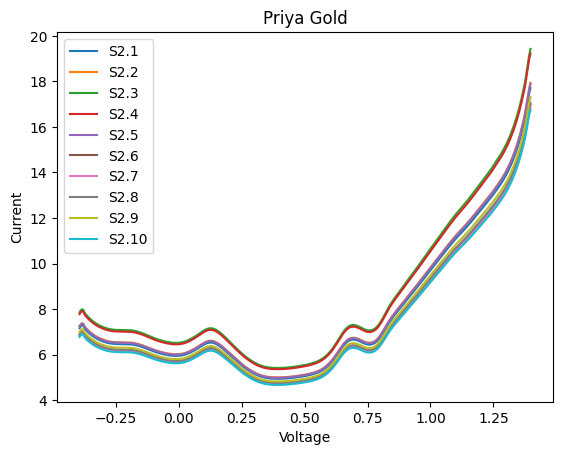

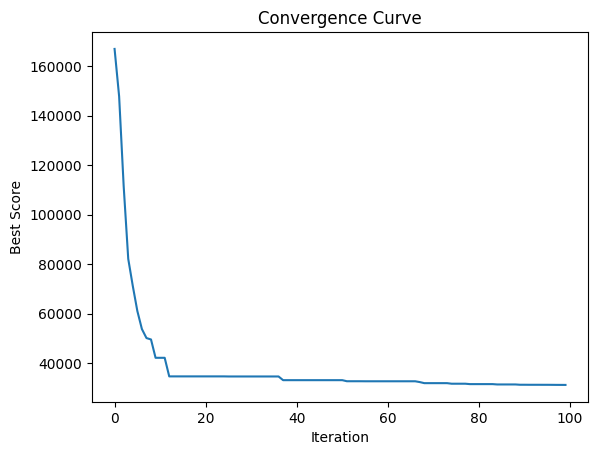

In [8]:
# Main function
if __name__ == "__main__":
    filename = 'sample2.xlsx'  # Replace with your actual file name
    filepath = '../' + filename
    include_rows = range(1, 358)  # Include rows
    data, df = load_data(filepath, include_rows)

    # Parameters
    bounds = [-10, 10]  # Adjust based on your problem
    dim = data.shape[1] - 1  # Exclude 'Result X' from dimensions
    pop_size = 20
    max_iter = 100

    # Exclude 'Result X' from data for the optimization
    data_for_optimization = data[:, 1:]

    best_solution, best_score, convergence_curve = gwo(
        objective_function, bounds, dim, pop_size, max_iter, data_for_optimization)

    print(f"Best Solution: {best_solution}")
    print(f"Best Score: {best_score}")

    # Plot the data
    title_name = 'Priya Gold'
    plot_data(df, title_name)


    # Plot the convergence curve
    plt.plot(convergence_curve)
    plt.title('Convergence Curve')
    plt.xlabel('Iteration')
    plt.ylabel('Best Score')
    plt.show()

Iteration: 1, Best Score: 68914.82374728851
Iteration: 2, Best Score: 68914.82374728851
Iteration: 3, Best Score: 54339.03000826268
Iteration: 4, Best Score: 38171.88784646521
Iteration: 5, Best Score: 31376.351600856684
Iteration: 6, Best Score: 30654.162269664124
Iteration: 7, Best Score: 22735.60425146991
Iteration: 8, Best Score: 22735.60425146991
Iteration: 9, Best Score: 22735.60425146991
Iteration: 10, Best Score: 22735.60425146991
Iteration: 11, Best Score: 20405.519632087195
Iteration: 12, Best Score: 20405.519632087195
Iteration: 13, Best Score: 20405.519632087195
Iteration: 14, Best Score: 20405.519632087195
Iteration: 15, Best Score: 20405.519632087195
Iteration: 16, Best Score: 18026.363334278252
Iteration: 17, Best Score: 18026.363334278252
Iteration: 18, Best Score: 18026.363334278252
Iteration: 19, Best Score: 18026.363334278252
Iteration: 20, Best Score: 18026.363334278252
Iteration: 21, Best Score: 18026.363334278252
Iteration: 22, Best Score: 18026.363334278252
Itera

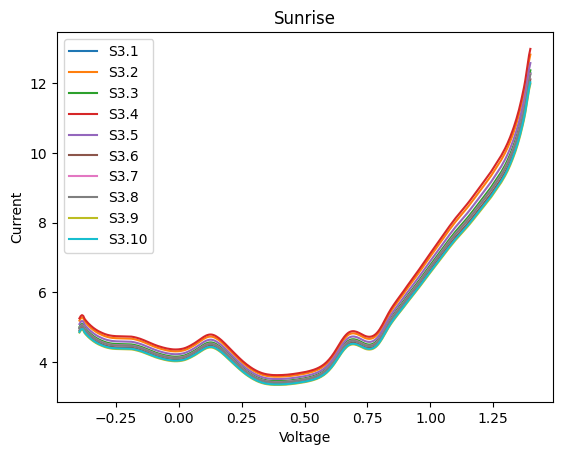

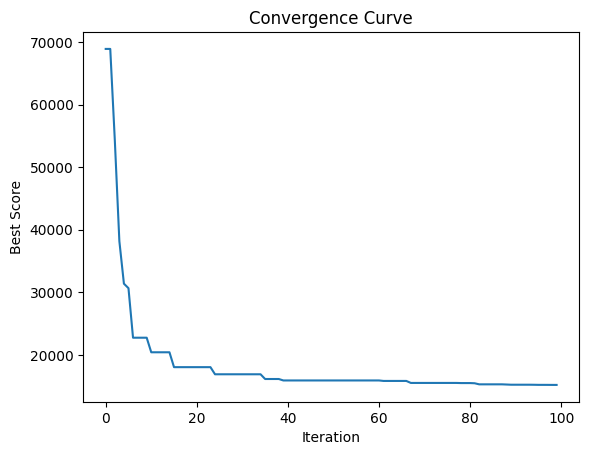

In [9]:
# Main function
if __name__ == "__main__":
    filename = 'sample3.xlsx'  # Replace with your actual file name
    filepath = '../' + filename
    include_rows = range(1, 358)  # Include rows
    data, df = load_data(filepath, include_rows)

    # Parameters
    bounds = [-10, 10]  # Adjust based on your problem
    dim = data.shape[1] - 1  # Exclude 'Result X' from dimensions
    pop_size = 20
    max_iter = 100

    # Exclude 'Result X' from data for the optimization
    data_for_optimization = data[:, 1:]

    best_solution, best_score, convergence_curve = gwo(
        objective_function, bounds, dim, pop_size, max_iter, data_for_optimization)

    print(f"Best Solution: {best_solution}")
    print(f"Best Score: {best_score}")

    # Plot the data
    title_name = 'Sunrise'
    plot_data(df, title_name)


    # Plot the convergence curve
    plt.plot(convergence_curve)
    plt.title('Convergence Curve')
    plt.xlabel('Iteration')
    plt.ylabel('Best Score')
    plt.show()

Iteration: 1, Best Score: 84919.59994028127
Iteration: 2, Best Score: 83815.27292423538
Iteration: 3, Best Score: 71999.25118370984
Iteration: 4, Best Score: 60563.0303699406
Iteration: 5, Best Score: 48915.4260027506
Iteration: 6, Best Score: 43721.34399252964
Iteration: 7, Best Score: 42669.12503858538
Iteration: 8, Best Score: 42669.12503858538
Iteration: 9, Best Score: 41713.65160709514
Iteration: 10, Best Score: 39515.02739245484
Iteration: 11, Best Score: 38608.02509682068
Iteration: 12, Best Score: 38608.02509682068
Iteration: 13, Best Score: 38608.02509682068
Iteration: 14, Best Score: 38608.02509682068
Iteration: 15, Best Score: 37160.33038869138
Iteration: 16, Best Score: 37160.33038869138
Iteration: 17, Best Score: 37160.33038869138
Iteration: 18, Best Score: 36250.824626347356
Iteration: 19, Best Score: 36250.824626347356
Iteration: 20, Best Score: 36250.824626347356
Iteration: 21, Best Score: 36250.824626347356
Iteration: 22, Best Score: 34639.865125888704
Iteration: 23, B

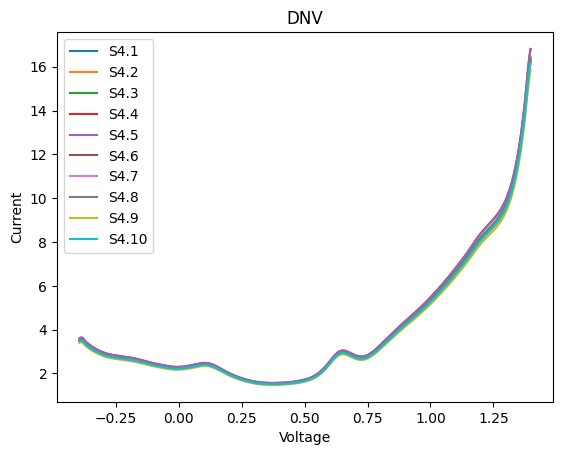

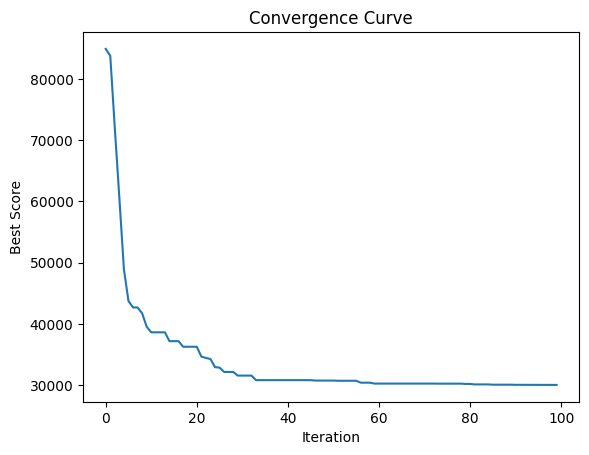

In [10]:
# Main function
if __name__ == "__main__":
    filename = 'sample4.xlsx'  # Replace with your actual file name
    filepath = '../' + filename
    include_rows = range(1, 358)  # Include rows
    data, df = load_data(filepath, include_rows)

    # Parameters
    bounds = [-10, 10]  # Adjust based on your problem
    dim = data.shape[1] - 1  # Exclude 'Result X' from dimensions
    pop_size = 20
    max_iter = 100

    # Exclude 'Result X' from data for the optimization
    data_for_optimization = data[:, 1:]

    best_solution, best_score, convergence_curve = gwo(
        objective_function, bounds, dim, pop_size, max_iter, data_for_optimization)

    print(f"Best Solution: {best_solution}")
    print(f"Best Score: {best_score}")

    # Plot the data
    title_name = 'DNV'
    plot_data(df, title_name)


    # Plot the convergence curve
    plt.plot(convergence_curve)
    plt.title('Convergence Curve')
    plt.xlabel('Iteration')
    plt.ylabel('Best Score')
    plt.show()